In [ ]:
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Access folder in Google Drive
folder_path = '/content/drive/MyDrive/AI Project'
os.chdir(folder_path)

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

### Importing dataset




In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/AI Project/datasets/Twitter_Data.csv')

In [ ]:
dataset.shape


(162980, 2)

In [ ]:
# dataset=dataset.tail(5000)
# dataset.shape

(5000, 2)

In [ ]:
# Retrieve a middle section of the dataset
start_index = 150
end_index = 10150
dataset = dataset[start_index:end_index]

In [ ]:
dataset.shape

(10000, 2)

In [ ]:
dataset.head()

,clean_text,category
150,modi will endup mad manlike hitler mussolini p...,-1.0
151,obc pass general log pass rrb rpf constable cu...,1.0
152,modi teli obc because his upbringing and minds...,0.0
153,vote kar narendra modi appeals everyone during...,0.0
154,politickle29 aisaa hai stages ोै ा aspiration ...,0.0


### Data Preprocessing

In [ ]:
import re
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import re

corpus = []
ps = PorterStemmer()
all_stopwords = set(stopwords.words('english'))

for i in range(150, 10150):
    text = dataset['clean_text'][i]
    if isinstance(text, str):
        clean_text = re.sub('[^a-zA-Z]', ' ', text)
        clean_text = clean_text.lower()
        clean_text = clean_text.split()
        clean_text = [ps.stem(word) for word in clean_text if not word in all_stopwords]
        clean_text = ' '.join(clean_text)
        corpus.append(clean_text)
    else:
        print(f"Invalid data at index {i} in 'clean_text': {text}")


In [ ]:
corpus

['modi endup mad manlik hitler mussolini pinochet nero stalin',
 'obc pass gener log pass rrb rpf constabl cut anusaryr modi hatao',
 'modi teli obc upbring mindset chowkidar kid would becom chowkidar gatekeep',
 'vote kar narendra modi appeal everyon tweetstorm via namo app',
 'politickl aisaa hai stage aspir kuch bhi karna hai inspir exampul modi respir becom lifebreath like modi jeevanshaile way life hindooizhm',
 'dear modi pleas uploa ded link post doordarshan india youtub holi celebr santiniketan',
 'vote non bjp parti would take countri forev underdevelop corrupt would forev spoil futur next gen vote modi alon',
 'sapna chaudhari dancer sonia gandhi bar dancer work bar maid per research done mean waitress like modi modi chaiwala daruwali',
 'malnutrit india constitu among worst affect mallikarjun kharg gulbarga fare worst malnutrit indic among highprofil constitu thiruvananthapuram best',
 'seem deliri understand summer hai oopar elect bhi modi act lyncher saal kahan bhaisaab',


### Data transformation

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1420)

In [ ]:
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

In [ ]:
# Saving BoW dictionary to later use in prediction
import pickle
bow_path = 'c1_BoW_Sentiment_Model.pkl'
pickle.dump(cv, open(bow_path, "wb"))

### Dividing dataset into training and test set

In [ ]:
from sklearn.model_selection import train_test_split

if len(X) == len(y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
else:
    # Adjust the data to have the same number of samples
    X = X[:999]  # Remove the extra sample from X
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


### Model fitting (Naive Bayes)

[[256 140  71]
 [ 67 564  34]
 [320 232 316]]
Sensitivy:  0.8938193343898574
Specificity:  0.6464646464646465
Naive Bayes Classification Report:
              precision    recall  f1-score   support

        -1.0       0.40      0.55      0.46       467
         0.0       0.60      0.85      0.70       665
         1.0       0.75      0.36      0.49       868

    accuracy                           0.57      2000
   macro avg       0.58      0.59      0.55      2000
weighted avg       0.62      0.57      0.55      2000



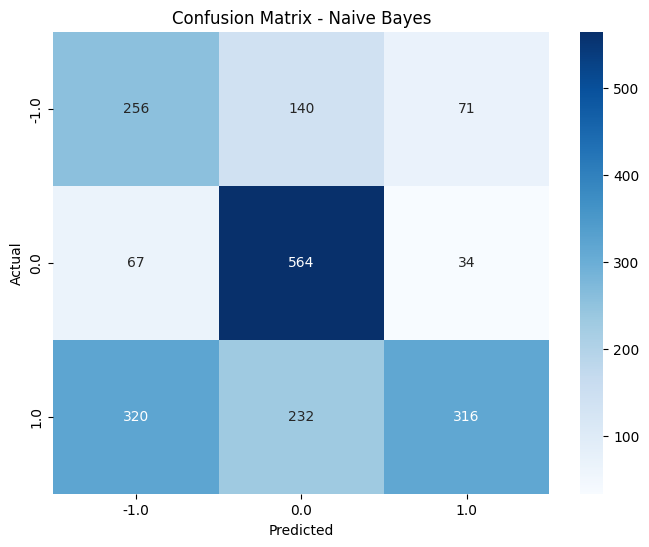

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns



classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Exporting NB Classifier to later use in prediction
import joblib
joblib.dump(classifier, 'c2_Classifier_Sentiment_Model')

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

print('Sensitivy: ',cm[1][1]/(cm[1][1]+cm[1][0]))
print('Specificity: ',cm[0][0]/(cm[0][0]+cm[0][1]))


# Classification report (Naive Bayes)
classification_rep_nb = classification_report(y_test, y_pred)
print("Naive Bayes Classification Report:")
print(classification_rep_nb)

# Get the predicted labels
y_pred = classifier.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels
class_labels = np.unique(np.concatenate((y_test, y_pred)))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)

# Set the title and axis labels
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Show the plot
plt.show()

### Model fitting (SVM)

SVM Confusion Matrix:
[[289  82  96]
 [ 54 558  53]
 [104 127 637]]
SVM Accuracy: 0.742
SVM Classification Report:
              precision    recall  f1-score   support

        -1.0       0.65      0.62      0.63       467
         0.0       0.73      0.84      0.78       665
         1.0       0.81      0.73      0.77       868

    accuracy                           0.74      2000
   macro avg       0.73      0.73      0.73      2000
weighted avg       0.74      0.74      0.74      2000

Sensitivy:  0.9117647058823529
Specificity:  0.7789757412398922


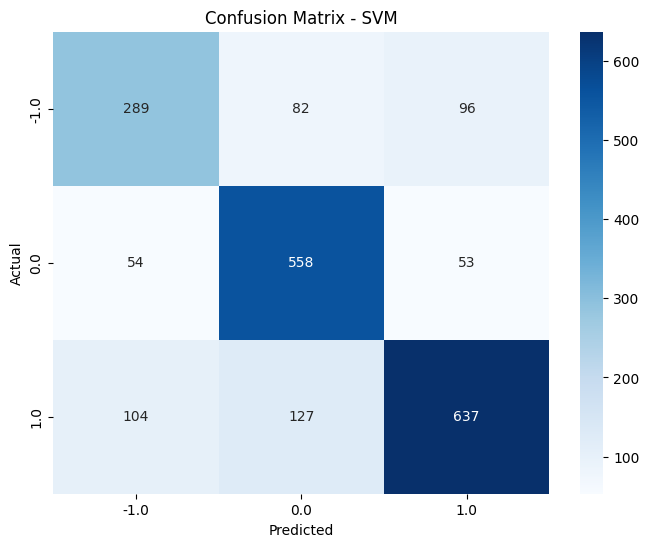

In [ ]:
### Model fitting (SVM)
from sklearn.svm import SVC
from sklearn.metrics import classification_report



classifier_svm = SVC(kernel='linear')
classifier_svm.fit(X_train, y_train)

# Exporting SVM Classifier to later use in prediction
joblib.dump(classifier_svm, 'c3_SVM_Sentiment_Model')

### Model performance (SVM)
y_pred_svm = classifier_svm.predict(X_test)

cm_svm = confusion_matrix(y_test, y_pred_svm)
print("SVM Confusion Matrix:")
print(cm_svm)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

# Classification report (SVM)
classification_rep_svm = classification_report(y_test, y_pred_svm)
print("SVM Classification Report:")
print(classification_rep_svm)

print('Sensitivy: ',cm_svm[1][1]/(cm_svm[1][1]+cm_svm[1][0]))
print('Specificity: ',cm_svm[0][0]/(cm_svm[0][0]+cm_svm[0][1]))


# Get the predicted labels
y_pred_svm = classifier_svm.predict(X_test)

# Calculate the confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Define class labels
class_labels = np.unique(np.concatenate((y_test, y_pred_svm)))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)

# Set the title and axis labels
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Show the plot
plt.show()


### Model fitting (Random Forest)

Random Forest Confusion Matrix:
[[273  92 102]
 [ 23 594  48]
 [ 65 136 667]]
Random Forest Accuracy: 0.767
Random Forest Classification Report:
              precision    recall  f1-score   support

        -1.0       0.76      0.58      0.66       467
         0.0       0.72      0.89      0.80       665
         1.0       0.82      0.77      0.79       868

    accuracy                           0.77      2000
   macro avg       0.77      0.75      0.75      2000
weighted avg       0.77      0.77      0.76      2000

Sensitivy:  0.9627228525121556
Specificity:  0.7479452054794521


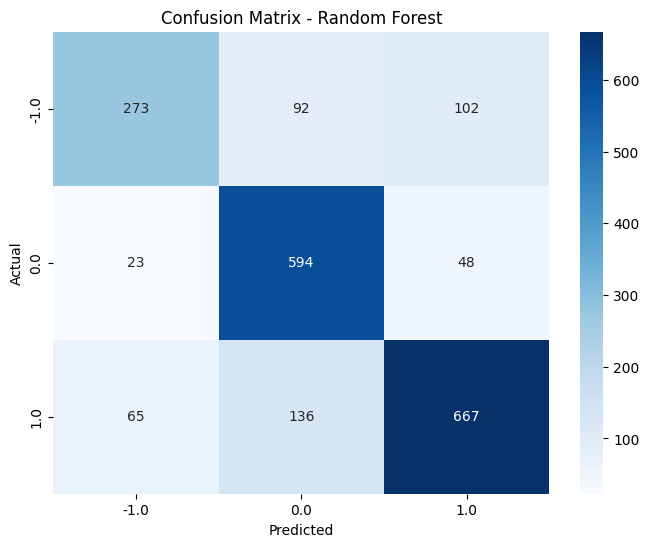

In [ ]:
### Model fitting (Random Forest)
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(n_estimators=100, random_state=0)
classifier_rf.fit(X_train, y_train)

# Exporting Random Forest Classifier to later use in prediction
joblib.dump(classifier_rf, 'c3_RF_Sentiment_Model')

### Model performance (Random Forest)
y_pred_rf = classifier_rf.predict(X_test)

cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:")
print(cm_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Classification report (Random Forest)
classification_rep_rf = classification_report(y_test, y_pred_rf)
print("Random Forest Classification Report:")
print(classification_rep_rf)

print('Sensitivy: ',cm_rf[1][1]/(cm_rf[1][1]+cm_rf[1][0]))
print('Specificity: ',cm_rf[0][0]/(cm_rf[0][0]+cm_rf[0][1]))


# Get the predicted labels
y_pred_rf = classifier_rf.predict(X_test)

# Calculate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Define class labels
class_labels = np.unique(np.concatenate((y_test, y_pred_rf)))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)

# Set the title and axis labels
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Show the plot
plt.show()

### Model fitting (Gradient Boosting)

Gradient Boosting Confusion Matrix:
[[219 173  75]
 [  5 636  24]
 [ 35 250 583]]
Gradient Boosting Accuracy: 0.719
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

        -1.0       0.85      0.47      0.60       467
         0.0       0.60      0.96      0.74       665
         1.0       0.85      0.67      0.75       868

    accuracy                           0.72      2000
   macro avg       0.77      0.70      0.70      2000
weighted avg       0.77      0.72      0.71      2000

Sensitivy:  0.9921996879875195
Specificity:  0.5586734693877551


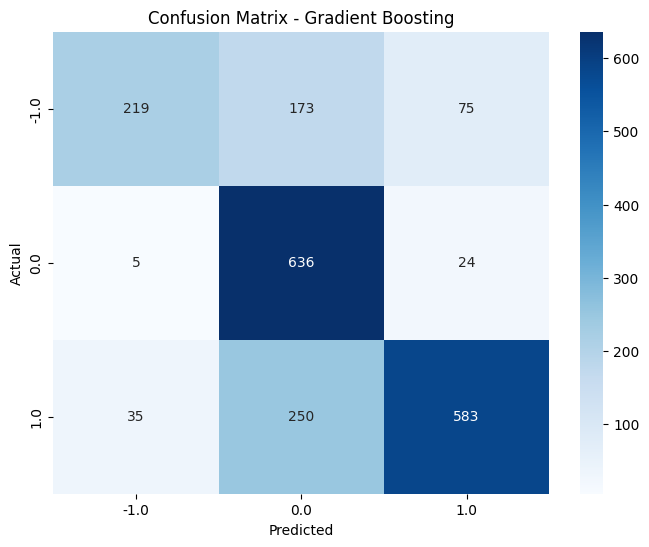

In [ ]:
### Model fitting (Gradient Boosting)
from sklearn.ensemble import GradientBoostingClassifier

classifier_gb = GradientBoostingClassifier(n_estimators=100, random_state=0)
classifier_gb.fit(X_train, y_train)

# Exporting Gradient Boosting Classifier to later use in prediction
joblib.dump(classifier_gb, 'c4_GB_Sentiment_Model')

### Model performance (Gradient Boosting)
y_pred_gb = classifier_gb.predict(X_test)

cm_gb = confusion_matrix(y_test, y_pred_gb)
print("Gradient Boosting Confusion Matrix:")
print(cm_gb)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)

# Classification report (Gradient Boosting)
classification_rep_gb = classification_report(y_test, y_pred_gb)
print("Gradient Boosting Classification Report:")
print(classification_rep_gb)

print('Sensitivy: ',cm_gb[1][1]/(cm_gb[1][1]+cm_gb[1][0]))
print('Specificity: ',cm_gb[0][0]/(cm_gb[0][0]+cm_gb[0][1]))



# Get the predicted labels
y_pred_gb = classifier_gb.predict(X_test)

# Calculate the confusion matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)

# Define class labels
class_labels = np.unique(np.concatenate((y_test, y_pred_gb)))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)

# Set the title and axis labels
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Show the plot
plt.show()

### Model fitting (Logistic Regression)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Confusion Matrix:
[[284  87  96]
 [ 42 557  66]
 [ 83 138 647]]
Logistic Regression Accuracy: 0.744
Logistic Regression Classification Report:
              precision    recall  f1-score   support

        -1.0       0.69      0.61      0.65       467
         0.0       0.71      0.84      0.77       665
         1.0       0.80      0.75      0.77       868

    accuracy                           0.74      2000
   macro avg       0.74      0.73      0.73      2000
weighted avg       0.75      0.74      0.74      2000

Sensitivy:  0.9298831385642737
Specificity:  0.7654986522911051


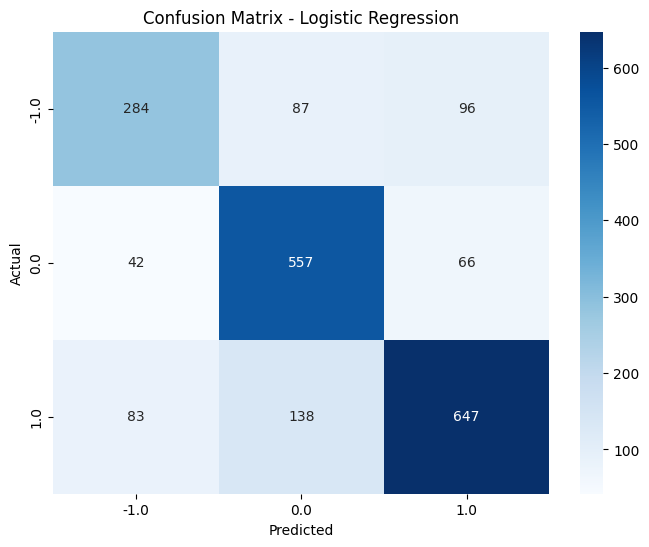

In [ ]:
### Model fitting (Logistic Regression)
from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression(random_state=0)
classifier_lr.fit(X_train, y_train)

# Exporting Logistic Regression Classifier to later use in prediction
joblib.dump(classifier_lr, 'c5_LR_Sentiment_Model')

### Model performance (Logistic Regression)
y_pred_lr = classifier_lr.predict(X_test)

cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Logistic Regression Confusion Matrix:")
print(cm_lr)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)

# Classification report (Logistic Regression)
classification_rep_lr = classification_report(y_test, y_pred_lr)
print("Logistic Regression Classification Report:")
print(classification_rep_lr)

print('Sensitivy: ',cm_lr[1][1]/(cm_lr[1][1]+cm_lr[1][0]))
print('Specificity: ',cm_lr[0][0]/(cm_lr[0][0]+cm_lr[0][1]))

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Get the predicted labels
y_pred_lr = classifier_lr.predict(X_test)

# Calculate the confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Define class labels
class_labels = np.unique(np.concatenate((y_test, y_pred_lr)))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)

# Set the title and axis labels
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Show the plot
plt.show()

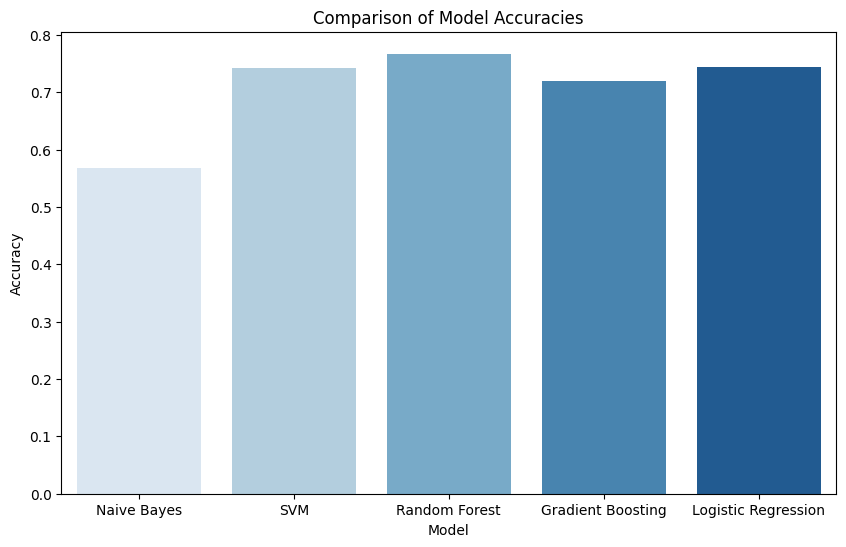

In [ ]:
# Create a list of model names and their corresponding accuracies
model_names = ['Naive Bayes', 'SVM', 'Random Forest', 'Gradient Boosting', 'Logistic Regression']
accuracies = [accuracy_score(y_test, y_pred), accuracy_svm, accuracy_rf, accuracy_gb, accuracy_lr]

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='Blues')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')

# Display the plot
plt.show()
